(84, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB
None

Slope :  0.001468696982641316

Intercept :  0.6258624722253536

Residual of sum squares :  0.892263745858133
R2 :  0.46949246374602127


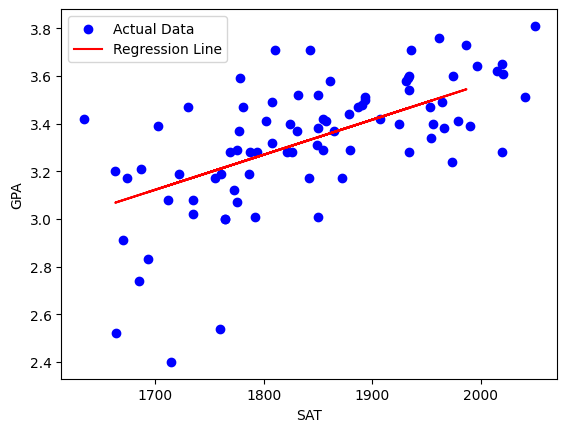

In [10]:
# ==============================
# Simple Linear Regression on diabetes.csv
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("1.01. Simple linear regression.csv")
print(df.shape)
print(df.info())
# print(df.head())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df[["SAT"]]
y = df["GPA"]


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("\nSlope : ", model.coef_[0])
print("\nIntercept : ", model.intercept_)

rss = np.sum((y_test- y_pred)**2)
print("\nResidual of sum squares : ",rss)

r2 = model.score(x_test, y_test)
print("R2 : ",r2)

plt.scatter(x,y, color="blue", label="Actual Data")
plt.plot(x_test, y_pred, color="red", label="Regression Line")
plt.xlabel("SAT");
plt.ylabel("GPA")
plt.legend();
plt.show()